### MLP

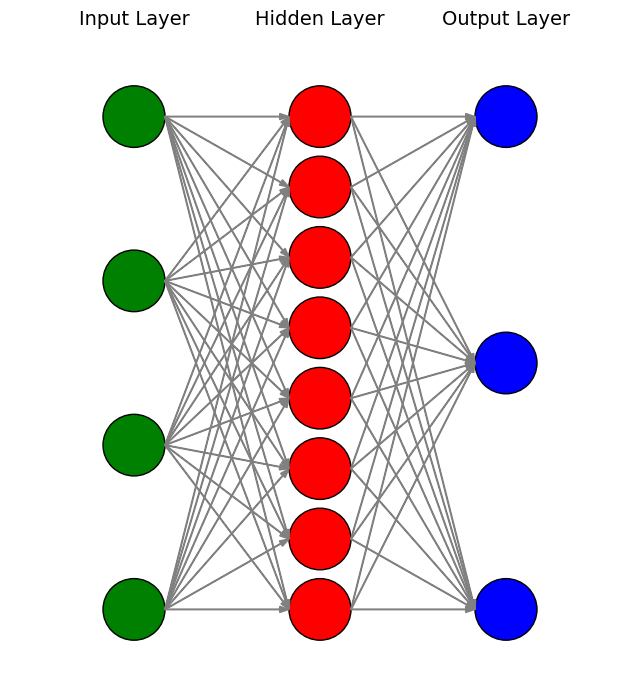

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow

# Define the number of neurons in each layer
n_input = 4
n_hidden = 8
n_output = 3

# Set up figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Define positions for neurons in each layer
input_neuron_positions = np.linspace(0.1, 0.9, n_input)
hidden_neuron_positions = np.linspace(0.1, 0.9, n_hidden)
output_neuron_positions = np.linspace(0.1, 0.9, n_output)

# Draw neurons
for i in range(n_input):
    circle = plt.Circle((0.2, input_neuron_positions[i]), 0.05, edgecolor='black', facecolor='green')
    ax.add_patch(circle)
for i in range(n_hidden):
    circle = plt.Circle((0.5, hidden_neuron_positions[i]), 0.05, edgecolor='black', facecolor='red')
    ax.add_patch(circle)
for i in range(n_output):
    circle = plt.Circle((0.8, output_neuron_positions[i]), 0.05, edgecolor='black', facecolor='blue')
    ax.add_patch(circle)

# Draw connections
for i in range(n_input):
    for j in range(n_hidden):
        arrow = FancyArrow(0.25, input_neuron_positions[i], 0.2, hidden_neuron_positions[j] - input_neuron_positions[i], 
                           width=0.001, shape='full', length_includes_head=True, head_width=0.01, edgecolor='gray', facecolor='gray')
        ax.add_patch(arrow)
for i in range(n_hidden):
    for j in range(n_output):
        arrow = FancyArrow(0.55, hidden_neuron_positions[i], 0.2, output_neuron_positions[j] - hidden_neuron_positions[i], 
                           width=0.001, shape='full', length_includes_head=True, head_width=0.01, edgecolor='gray', facecolor='gray')
        ax.add_patch(arrow)

# Add layer labels
plt.text(0.2, 1.05, 'Input Layer', horizontalalignment='center', fontsize=14)
plt.text(0.5, 1.05, 'Hidden Layer', horizontalalignment='center', fontsize=14)
plt.text(0.8, 1.05, 'Output Layer', horizontalalignment='center', fontsize=14)

# Remove axis
plt.axis('off')

# Show the plot
plt.show()


### SVM

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드 (예: 붓꽃 데이터셋)
iris = datasets.load_iris()
X = iris.data[:, :2] # 두 개의 특성만 사용
y = iris.target

# 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# SVM 모델 생성
svm_model = SVC(kernel='linear', C=0.8)

# 모델 훈련
svm_model.fit(X_train, y_train)

# 테스트 세트에서의 정확도 계산
accuracy = svm_model.score(X_test, y_test)
print(f'Accuracy: {round(accuracy*100,2)}%')


Accuracy: 73.33%


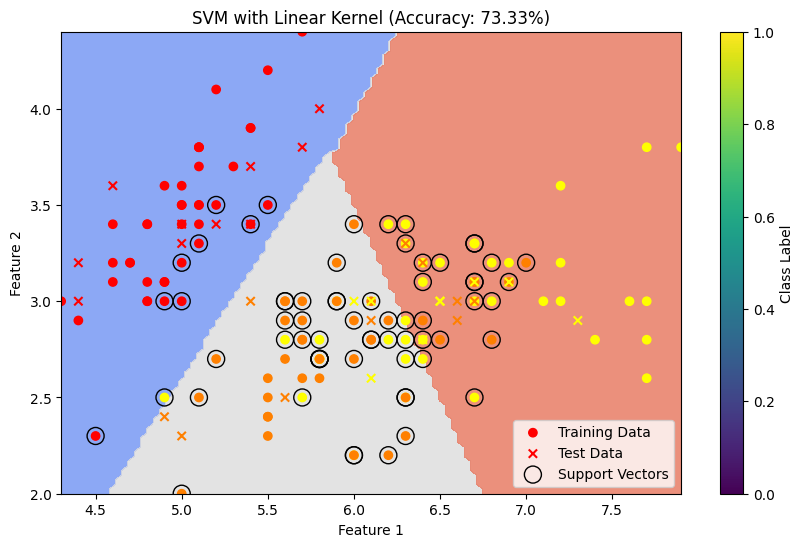

In [19]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# 그리드 포인트에서의 예측 클래스 라벨 계산
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 컨투어 레벨(2차원 공간에서 동일한 값을 가지는 지점들을 연결한 선)을 정의하여 결정 경계를 더 세밀하게 표시합니다.
contour_levels = np.linspace(Z.min(), Z.max(), 4)

# 훈련 데이터, 테스트 데이터, 서포트 벡터를 명확하게 구분하기 위해 마커와 색상을 조정합니다.
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, levels=contour_levels, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn', marker='o', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn', marker='x', label='Test Data')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=150, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'SVM with Linear Kernel (Accuracy: {round(accuracy*100,2)}%)')
plt.legend(loc='lower right')
plt.colorbar(label='Class Label')
plt.show()




In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import accuracy_score

# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 트레이닝 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 첫 번째 나무 시각화
dot_data = export_graphviz(model.estimators_[0], out_file=None, filled=True, feature_names=data.feature_names, class_names=[str(i) for i in data.target_names], rounded=True)
graph = graphviz.Source(dot_data)
graph.render("tree")  # 파일로 저장
graph.view("tree")    # 화면에 표시

Accuracy: 96.49%


'tree.pdf'

# GBM

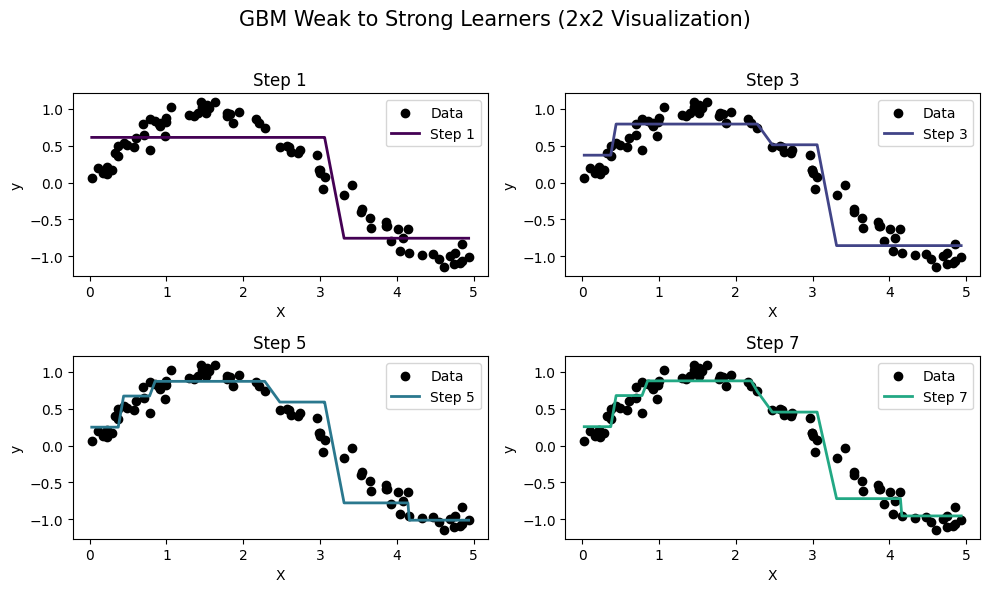

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

# 임의의 데이터 생성
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Gradient Boosting Regressor 생성
n_estimators = 10
reg = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=1, learning_rate=1.0, random_state=42)

# 각 약한 학습기의 예측을 저장할 리스트
predictions = []

# 약한 학습기를 하나씩 추가하면서 학습
for i in range(1, n_estimators + 1):
    reg.n_estimators = i
    reg.fit(X, y)
    predictions.append(reg.predict(X))

# 2x2 형태로 그림 그리기
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.ravel()

# 각 단계별로 예측 시각화
for i, ax in enumerate(axes):
    step = i * (n_estimators // 4)
    ax.scatter(X, y, c='k', label='Data')
    ax.plot(X, predictions[step], lw=2, label=f'Step {step + 1}', color=plt.cm.viridis(step / n_estimators))
    ax.legend(loc='best')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title(f'Step {step + 1}')

plt.suptitle('GBM Weak to Strong Learners (2x2 Visualization)', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# XGB

In [8]:
from xgboost import XGBClassifier, plot_tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import xgboost

# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 트레이닝 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# 모델 학습
xgb_model.fit(X_train, y_train)

# 예측 수행
xgb_y_pred = xgb_model.predict(X_test)

# 정확도 출력
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_accuracy * 100 # 95.62%

# 첫 번째 나무 출력
fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(xgb_model, num_trees=0, ax=ax)
plt.savefig('xgb_plot.png')
plt.show()

c:\Users\이동현\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


'그림/xgb_plot.dot'

In [7]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# LGBM

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

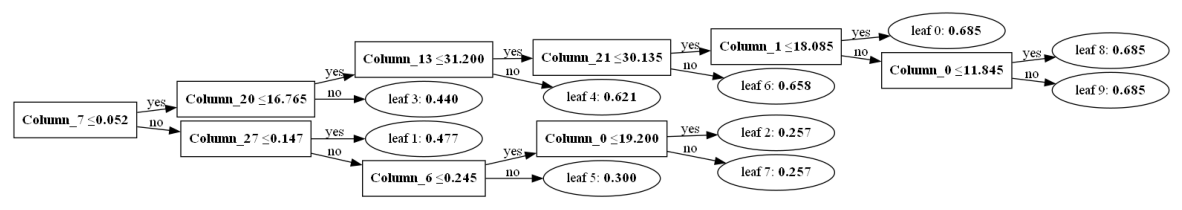

In [11]:
from lightgbm import LGBMClassifier, plot_tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 트레이닝 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)

# 모델 학습
lgbm_model.fit(X_train, y_train)

# 예측 수행
lgbm_y_pred = lgbm_model.predict(X_test)

# 정확도 출력
lgbm_accuracy = accuracy_score(y_test, lgbm_y_pred)
print(f'Accuracy: {lgbm_accuracy * 100:.2f}%') # 96.49%

# 첫 번째 나무 출력
fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(lgbm_model,ax=ax)
plt.savefig('lgbm_plot.png')
plt.show()